<a href="https://colab.research.google.com/github/udaykumar-2204/Code-Alpha-_-Sales-Prediction-using-Python.ipynb/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Upload in Google Colab (only needed in Colab)
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("advertising.csv")  # replace with your file name

# Preview
df.head()


Saving advertising.csv to advertising.csv


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()
df.describe()
df.isnull().sum()  # Check for nulls

# Rename columns for consistency
df.columns = df.columns.str.strip().str.lower()  # Ensures names are clean: 'tv', 'radio', etc.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
X = df[['tv', 'radio', 'newspaper']]
y = df['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred) # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} -- Helps measure prediction error." )

print(f"R² Score: {r2:.2f} -- Indicates how well the model explains the variance in sales.")

RMSE: 1.78 -- Helps measure prediction error.
R² Score: 0.90 -- Indicates how well the model explains the variance in sales.


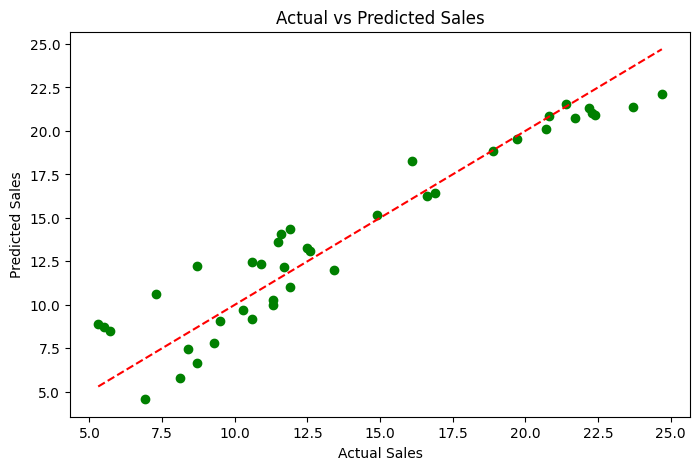

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


           Coefficient
tv            0.044730
radio         0.189195
newspaper     0.002761


Sales increase by 0.045 units for every 1K increase in TV ad spend .

Sales increase by 0.187 units per 1K radio spend.

Sales increase by 0.001 units per 1K newspaper spend.

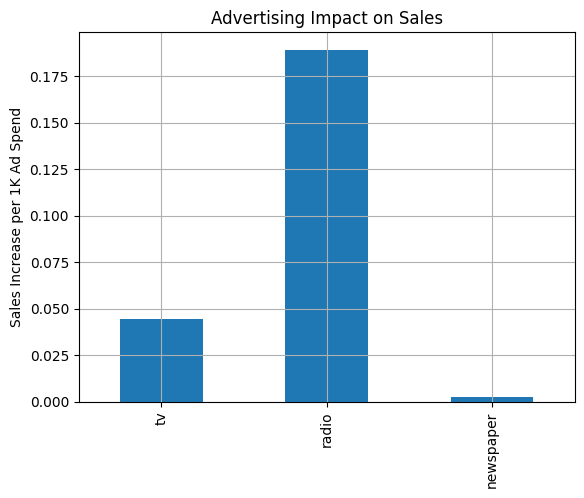

In [ ]:
coeff_df.plot(kind='bar', legend=False, title='Advertising Impact on Sales')
plt.ylabel("Sales Increase per 1K Ad Spend")
plt.grid(True)
plt.show()


**Predict Sales Changes with Ad Spend Changes**:  

In [ ]:
# Example: What if we spend 25K on TV, 125K on radio, 15K on newspaper?
new_data = pd.DataFrame([[25, 125, 15]], columns=['tv', 'radio', 'newspaper'])
predicted_sales = model.predict(new_data)

print("Predicted Sales for given ad budget (in thousands):", predicted_sales[0])


Predicted Sales for given ad budget (in thousands): 27.78810376925811


# 📌 Key Insights from Sales Prediction Project
1.Radio advertising has the strongest positive impact on sales, indicating it is the most effective channel for driving revenue based on our regression model.

2.Radio campaigns deliver high returns relative to investment, making them an excellent option for cost-effective marketing strategies.

3.Newspaper advertising shows minimal impact on sales, suggesting that reallocating budget to higher-performing channels like radio or TV may improve overall performance.

4.Our predictive model supports strategic budget simulations, enabling businesses to forecast sales outcomes for different combinations of advertising spend and optimize marketing ROI.  